In [27]:
%pylab inline
import matplotlib.pyplot as plt
from __future__ import print_function
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras import backend as K

Populating the interactive namespace from numpy and matplotlib


/root/.pyenv/versions/2.7.13/lib/python2.7/site-packages/IPython/core/magics/pylab.py:161: UserWarning: pylab import has clobbered these variables: ['f']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


In [28]:
import tensorflow as tf
config = tf.ConfigProto()
config.gpu_options.per_process_gpu_memory_fraction = 0.1
K.tensorflow_backend.set_session(tf.Session(config=config))

In [29]:
batch_size = 128
num_classes = 10
epochs = 12
img_rows, img_cols = 28, 28

In [30]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

7


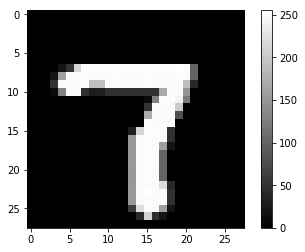

In [31]:
plt.imshow(x_train[10002],cmap=plt.cm.gray,interpolation="nearest")
plt.colorbar()
print (y_train[10002])

In [32]:
x_train = x_train.reshape(x_train.shape[0],img_rows,img_cols,1)
x_test = x_test.reshape(x_test.shape[0],img_rows,img_cols,1)
input_shape = (img_rows, img_cols, 1)

In [33]:
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255

3


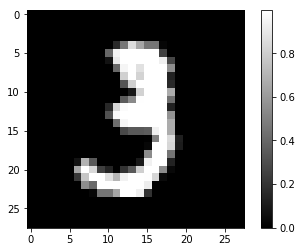

In [34]:
plt.imshow(x_train[10,:,:,0],cmap=plt.cm.gray,interpolation="nearest")
plt.colorbar()
print (y_train[10])

In [35]:
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)
print (x_train.shape)
print (y_train.shape)

(60000, 28, 28, 1)
(60000, 10)


In [39]:
model = Sequential()
model.add(Conv2D(32, kernel_size=(3,3), activation='relu', 
                 input_shape=input_shape,padding='same'))
model.add(Conv2D(64,(3,3),activation='relu',padding='same'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128,activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))

In [40]:
model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adadelta(),metrics=['accuracy'])

In [41]:
history = model.fit(x_train,y_train,
                    batch_size=batch_size,
                    epochs=epochs,verbose=1,validation_data=(x_test,y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/12
60000/60000 [==============================] - 6s - loss: 0.2287 - acc: 0.9336 - val_loss: 0.0649 - val_acc: 0.9798
Epoch 2/12
60000/60000 [==============================] - 6s - loss: 0.0570 - acc: 0.9832 - val_loss: 0.0494 - val_acc: 0.9843
Epoch 3/12
60000/60000 [==============================] - 6s - loss: 0.0379 - acc: 0.9886 - val_loss: 0.0427 - val_acc: 0.9855
Epoch 4/12
60000/60000 [==============================] - 6s - loss: 0.0277 - acc: 0.9915 - val_loss: 0.0324 - val_acc: 0.9887
Epoch 5/12
60000/60000 [==============================] - 6s - loss: 0.0213 - acc: 0.9934 - val_loss: 0.0406 - val_acc: 0.9869
Epoch 6/12
60000/60000 [==============================] - 6s - loss: 0.0167 - acc: 0.9952 - val_loss: 0.0285 - val_acc: 0.9904
Epoch 7/12
60000/60000 [==============================] - 6s - loss: 0.0124 - acc: 0.9964 - val_loss: 0.0317 - val_acc: 0.9896
Epoch 8/12
60000/60000 [==============================] - 6s 

In [13]:
score = model.evaluate(x_test,y_test,verbose=0)
print (score)

[0.031727321438450598, 0.98950000000000005]


In [14]:
result = model.predict_classes(x_test)

 9728/10000 [============================>.] - ETA: 0s

In [16]:
result[0:10]

array([7, 2, 1, 0, 4, 1, 4, 9, 5, 9])

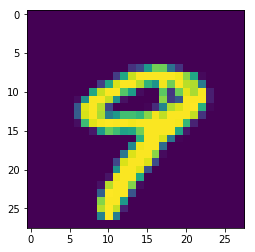

In [27]:
plt.imshow(x_test[9,:,:,0])

In [26]:
y_test[8]

array([ 0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.])

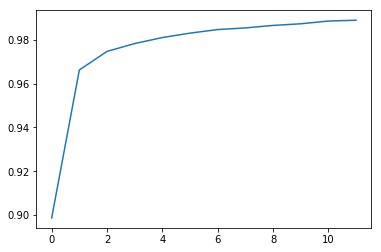

In [39]:
plt.plot(history.history['acc'])

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11]

In [13]:
model.save("mnist_model.h5")

In [14]:
mnist_model_json = model.to_json()

In [26]:
import pickle
with open('mnist_history.dump','wb') as f:
    pickle.dump(history.history,f)